# Part 1 ‑ Exploratory data analysis

#### The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.


In [112]:
import json
from datetime import datetime
from collections import defaultdict
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
with open('logins.json', 'r') as json_file:
    logins = json.load(json_file)

In [4]:
logins

{'login_time': ['1970-01-01 20:13:18',
  '1970-01-01 20:16:10',
  '1970-01-01 20:16:37',
  '1970-01-01 20:16:36',
  '1970-01-01 20:26:21',
  '1970-01-01 20:21:41',
  '1970-01-01 20:12:16',
  '1970-01-01 20:35:47',
  '1970-01-01 20:35:38',
  '1970-01-01 20:47:52',
  '1970-01-01 20:26:05',
  '1970-01-01 20:31:03',
  '1970-01-01 20:34:46',
  '1970-01-01 20:36:34',
  '1970-01-01 20:39:25',
  '1970-01-01 20:40:37',
  '1970-01-01 20:34:58',
  '1970-01-01 20:43:59',
  '1970-01-01 20:47:46',
  '1970-01-01 20:46:34',
  '1970-01-01 20:56:07',
  '1970-01-01 20:49:12',
  '1970-01-01 20:59:06',
  '1970-01-01 20:59:59',
  '1970-01-01 21:15:01',
  '1970-01-01 21:09:24',
  '1970-01-01 21:19:24',
  '1970-01-01 21:20:53',
  '1970-01-01 21:29:19',
  '1970-01-01 21:58:05',
  '1970-01-01 21:51:51',
  '1970-01-01 21:59:40',
  '1970-01-01 22:08:34',
  '1970-01-01 22:02:51',
  '1970-01-01 21:58:32',
  '1970-01-01 22:02:31',
  '1970-01-01 22:05:32',
  '1970-01-01 22:02:46',
  '1970-01-01 22:10:28',
  '1970-01-

In [3]:
logins.keys()

dict_keys(['login_time'])

In [5]:
logins_list = logins['login_time']
logins_list[:12]

['1970-01-01 20:13:18',
 '1970-01-01 20:16:10',
 '1970-01-01 20:16:37',
 '1970-01-01 20:16:36',
 '1970-01-01 20:26:21',
 '1970-01-01 20:21:41',
 '1970-01-01 20:12:16',
 '1970-01-01 20:35:47',
 '1970-01-01 20:35:38',
 '1970-01-01 20:47:52',
 '1970-01-01 20:26:05',
 '1970-01-01 20:31:03']

In [62]:
df = pd.DataFrame(logins)
df

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21
...,...
93137,1970-04-13 18:50:19
93138,1970-04-13 18:43:56
93139,1970-04-13 18:54:02
93140,1970-04-13 18:57:38


In [63]:
df.describe()

,login_time
count,93142
unique,92265
top,1970-02-24 23:09:57
freq,3


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null object
dtypes: object(1)
memory usage: 727.8+ KB


In [64]:
df['time2'] = pd.to_datetime(df.login_time)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 2 columns):
login_time    93142 non-null object
time2         93142 non-null datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 1.4+ MB


In [65]:
df

,login_time,time2
0,1970-01-01 20:13:18,1970-01-01 20:13:18
1,1970-01-01 20:16:10,1970-01-01 20:16:10
2,1970-01-01 20:16:37,1970-01-01 20:16:37
3,1970-01-01 20:16:36,1970-01-01 20:16:36
4,1970-01-01 20:26:21,1970-01-01 20:26:21
...,...,...
93137,1970-04-13 18:50:19,1970-04-13 18:50:19
93138,1970-04-13 18:43:56,1970-04-13 18:43:56
93139,1970-04-13 18:54:02,1970-04-13 18:54:02
93140,1970-04-13 18:57:38,1970-04-13 18:57:38


In [88]:
df2 = df.set_index('time2')
df2['count'] = 1
df2.drop('login_time', inplace=True, axis=1)

df2

,count
time2,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1
...,...
1970-04-13 18:50:19,1
1970-04-13 18:43:56,1
1970-04-13 18:54:02,1


In [98]:
df15 = df2.resample('15T').count()
df15

,count
time2,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


In [99]:
df15.sort_values('count',ascending=False)

,count
time2,
1970-03-01 04:30:00,73
1970-04-04 05:30:00,66
1970-04-04 01:30:00,64
1970-04-04 01:15:00,63
1970-04-01 23:30:00,60
...,...
1970-01-11 09:45:00,0
1970-02-16 08:15:00,0
1970-01-27 08:30:00,0


,time2,count,datepart,hour_of_day,minutes_of_day,hhmm,day_of_week
8560,1970-04-01 00:00:00,15,1970-04-01,0,0,00:00,2
8561,1970-04-01 00:15:00,11,1970-04-01,0,15,00:15,2
8562,1970-04-01 00:30:00,14,1970-04-01,0,30,00:30,2
8563,1970-04-01 00:45:00,19,1970-04-01,0,45,00:45,2
8564,1970-04-01 01:00:00,16,1970-04-01,1,60,01:00,2
...,...,...,...,...,...,...,...
9783,1970-04-13 17:45:00,5,1970-04-13,17,1065,17:45,0
9784,1970-04-13 18:00:00,5,1970-04-13,18,1080,18:00,0
9785,1970-04-13 18:15:00,2,1970-04-13,18,1095,18:15,0
9786,1970-04-13 18:30:00,7,1970-04-13,18,1110,18:30,0


In [210]:
dfwork = df15.reset_index()
 
dfwork

,time2,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1
...,...,...
9783,1970-04-13 17:45:00,5
9784,1970-04-13 18:00:00,5
9785,1970-04-13 18:15:00,2
9786,1970-04-13 18:30:00,7


Text(0, 0.5, 'Calls')

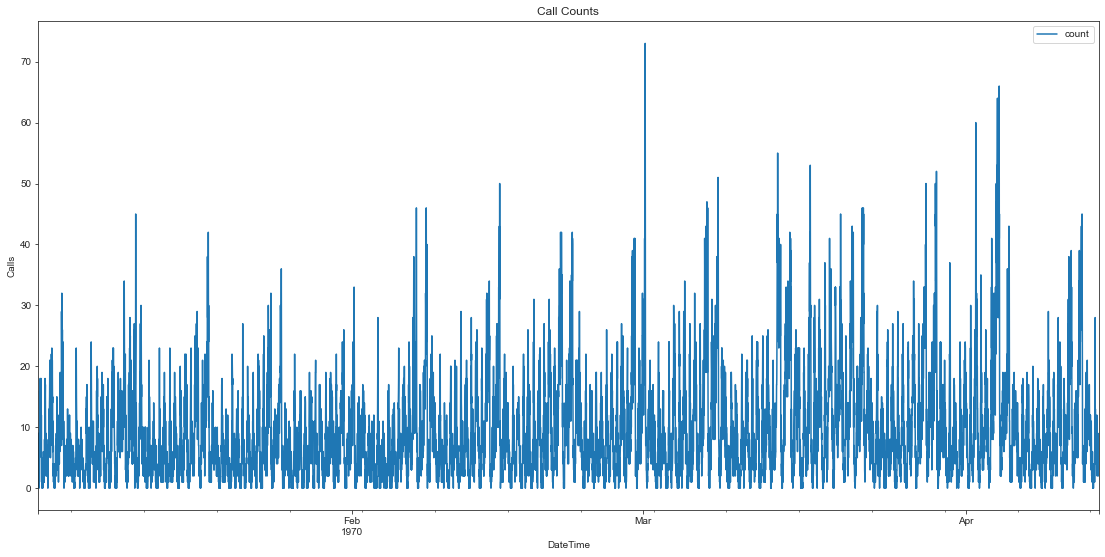

In [211]:
dfwork.plot(x='time2', y='count',figsize=(19,9))
plt.title('Call Counts')
plt.xlabel('DateTime')
plt.ylabel('Calls')

Text(0, 0.5, 'Calls')

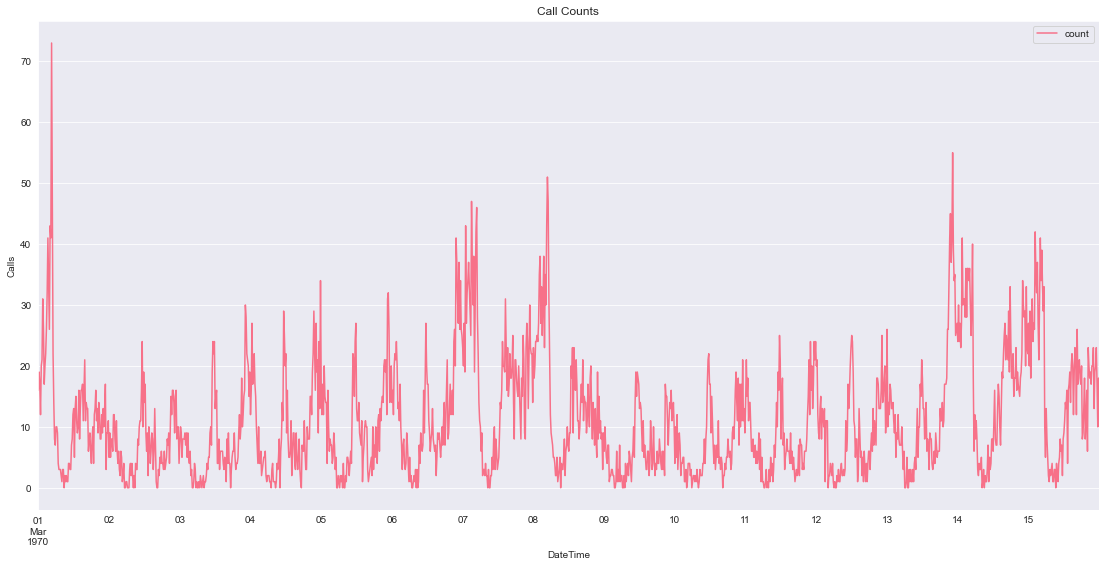

In [296]:
# zoom in on the first 2 weeks of March to more closely observe cycles

dfwork[(dfwork['time2'].dt.month == 3) & (dfwork['time2'].dt.day < 16)].plot(x='time2', y='count',figsize=(19,9))
plt.title('Call Counts')
plt.xlabel('DateTime')
plt.ylabel('Calls')


 

In [212]:
dfwork['datepart'] = dfwork.time2.dt.date

dfwork['hour_of_day'] = dfwork.time2.dt.hour
dfwork['minutes_of_day'] = (dfwork.time2.dt.hour * 60) + dfwork.time2.dt.minute
dfwork['hhmm'] = dfwork.hour_of_day.astype(str).str.zfill(2) + ':' + dfwork.time2.dt.minute.astype(str).str.zfill(2)

dfwork['day_of_week'] = dfwork.time2.dt.dayofweek

dfwork

,time2,count,datepart,hour_of_day,minutes_of_day,hhmm,day_of_week
0,1970-01-01 20:00:00,2,1970-01-01,20,1200,20:00,3
1,1970-01-01 20:15:00,6,1970-01-01,20,1215,20:15,3
2,1970-01-01 20:30:00,9,1970-01-01,20,1230,20:30,3
3,1970-01-01 20:45:00,7,1970-01-01,20,1245,20:45,3
4,1970-01-01 21:00:00,1,1970-01-01,21,1260,21:00,3
...,...,...,...,...,...,...,...
9783,1970-04-13 17:45:00,5,1970-04-13,17,1065,17:45,0
9784,1970-04-13 18:00:00,5,1970-04-13,18,1080,18:00,0
9785,1970-04-13 18:15:00,2,1970-04-13,18,1095,18:15,0
9786,1970-04-13 18:30:00,7,1970-04-13,18,1110,18:30,0


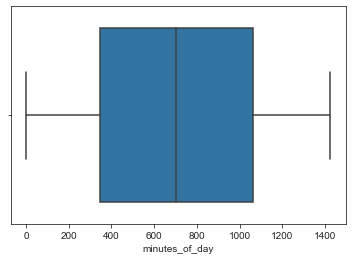

In [213]:
sns.boxplot(dfwork.minutes_of_day)

# Plot call distribution by 15 minute daily intervals

Text(0.5, 1.0, 'Call distribution by 15 minute daily interval')

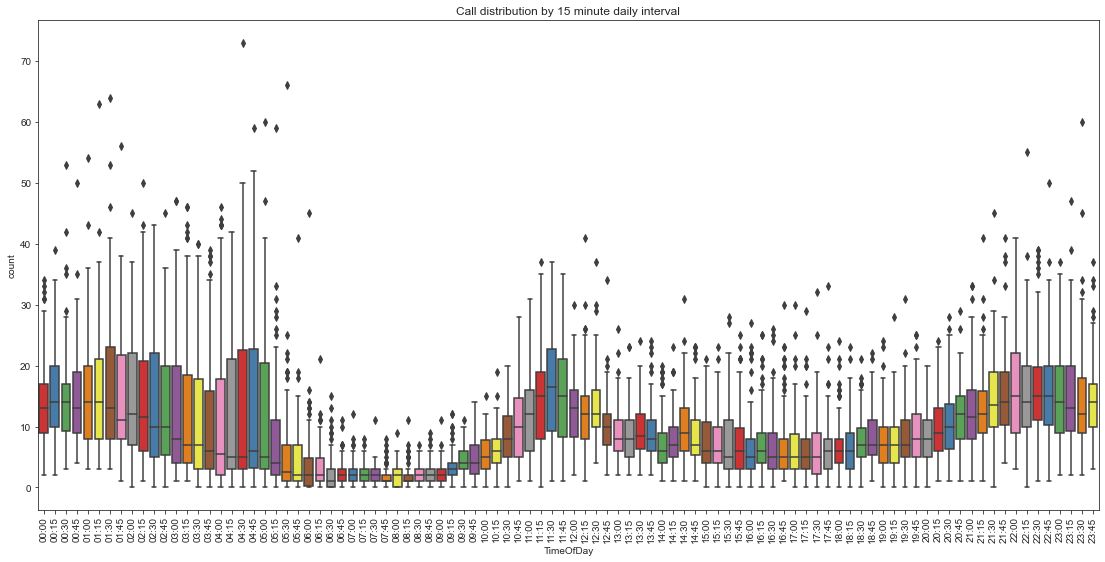

In [217]:
dfworksort = dfwork.sort_values(['hhmm', 'time2'])

# Hour of Day order size
#hodordersize = tod.groupby(['order_id','order_hour_of_day']).agg(ordersize=('reordered','count')).reset_index()

sns.set_style('ticks')
fig, ax = plt.subplots()
# set size
fig.set_size_inches(19, 9)

myplot = sns.boxplot(x="hhmm", y="count", 
            data=dfworksort, 
            palette="Set1")

myplot.set_xticklabels(myplot.get_xticklabels(), rotation=90)

plt.xlabel('TimeOfDay')
plt.title('Call distribution by 15 minute daily interval')

In [218]:
dfworksort

,time2,count,datepart,hour_of_day,minutes_of_day,hhmm,day_of_week
16,1970-01-02 00:00:00,10,1970-01-02,0,0,00:00,4
112,1970-01-03 00:00:00,5,1970-01-03,0,0,00:00,5
208,1970-01-04 00:00:00,11,1970-01-04,0,0,00:00,6
304,1970-01-05 00:00:00,8,1970-01-05,0,0,00:00,0
400,1970-01-06 00:00:00,7,1970-01-06,0,0,00:00,1
...,...,...,...,...,...,...,...
9327,1970-04-08 23:45:00,19,1970-04-08,23,1425,23:45,2
9423,1970-04-09 23:45:00,17,1970-04-09,23,1425,23:45,3
9519,1970-04-10 23:45:00,17,1970-04-10,23,1425,23:45,4
9615,1970-04-11 23:45:00,19,1970-04-11,23,1425,23:45,5


# Plot hourly number of calls by day of week (dow)

In [ ]:
# get hourly by Day of week

# extract parts: datePart, hour, day of week -- done above
# sum() by the parts
# group by DOW, HOD ==> mean()

In [222]:
dfhod = dfworksort.groupby(['datepart', 'day_of_week', 'hour_of_day'])['count'].sum().reset_index()
dfhod.sort_values(['datepart', 'hour_of_day'])
dfhod

,datepart,day_of_week,hour_of_day,count
0,1970-01-01,3,20,24
1,1970-01-01,3,21,9
2,1970-01-01,3,22,21
3,1970-01-01,3,23,58
4,1970-01-02,4,0,53
...,...,...,...,...
2442,1970-04-13,0,14,32
2443,1970-04-13,0,15,19
2444,1970-04-13,0,16,22
2445,1970-04-13,0,17,22


In [206]:
gmean = dfhod.groupby(['day_of_week', 'hour_of_day'])['count'].mean().reset_index()
gmean

,day_of_week,hour_of_day,count
0,0,0,35.400000
1,0,1,27.600000
2,0,2,20.800000
3,0,3,15.733333
4,0,4,13.733333
...,...,...,...
163,6,19,42.133333
164,6,20,40.800000
165,6,21,41.666667
166,6,22,38.866667


Text(0, 0.5, 'Mean Calls')

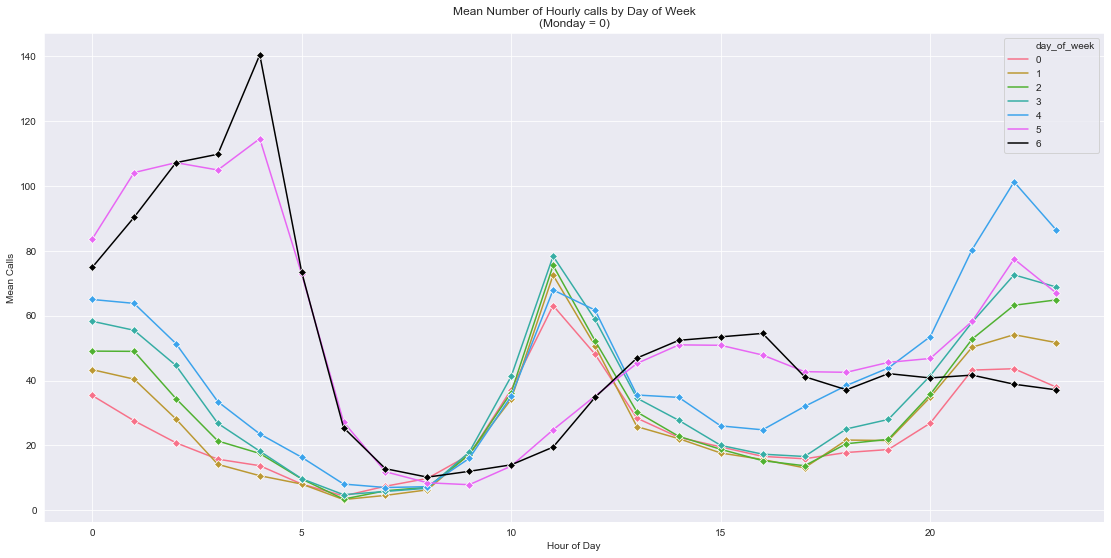

In [288]:
fig, ax = plt.subplots()
fig.set_size_inches(19, 9)

 
sns.set_style("darkgrid")


#sns.set_palette("husl")
sns.lineplot(x='hour_of_day', y='count', data=gmean,   hue='day_of_week', legend='full', marker = 'D',
             palette=["C0", "C1","C2","C3","C4","C5", "k"])

plt.title('Mean Number of Hourly calls by Day of Week' +  '\n' +  '(Monday = 0)')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Calls')
 

Text(0, 0.5, 'Mean Calls')

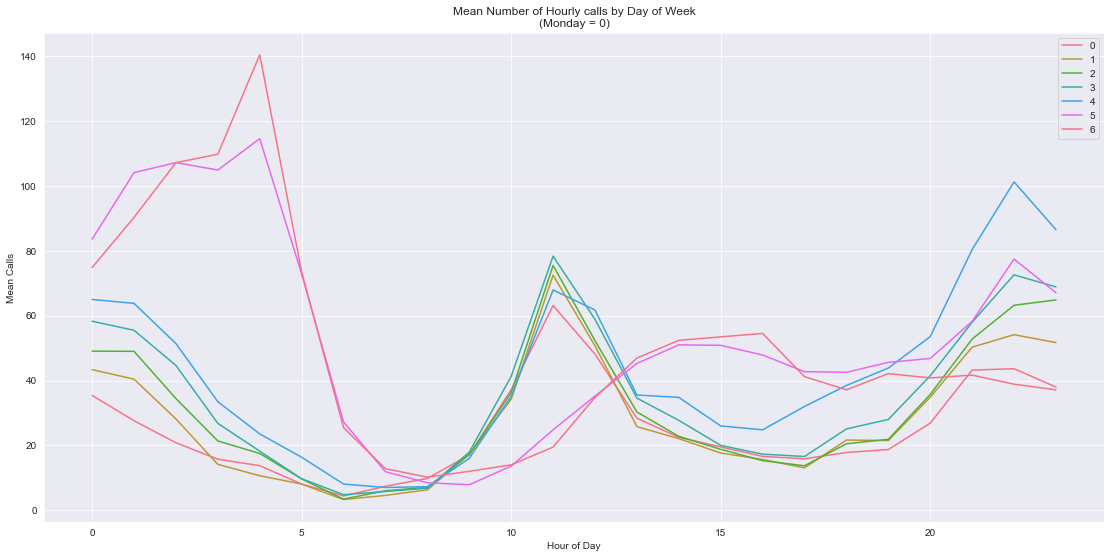

In [298]:
# HOURLY totals (i.e., not the 15 minute interval averages)

groups = gmean.groupby('day_of_week')

fig, ax = plt.subplots()
fig.set_size_inches(19, 9)
for label, group in groups:
#    print(label, group)
    ax.plot(group['hour_of_day'], group['count'],  label=label)
plt.legend()
#xtitle = 'Mean Number of Hourly calls by Day of Week' +  ''\n' +  'Monday = 0'

plt.title('Mean Number of Hourly calls by Day of Week' +  '\n' +  '(Monday = 0)')
plt.xlabel('Hour of Day')
plt.ylabel('Mean Calls')

# Plot 15 minute interval number of calls by day of week 

In [245]:
dfworksort

,time2,count,datepart,hour_of_day,minutes_of_day,hhmm,day_of_week
16,1970-01-02 00:00:00,10,1970-01-02,0,0,00:00,4
112,1970-01-03 00:00:00,5,1970-01-03,0,0,00:00,5
208,1970-01-04 00:00:00,11,1970-01-04,0,0,00:00,6
304,1970-01-05 00:00:00,8,1970-01-05,0,0,00:00,0
400,1970-01-06 00:00:00,7,1970-01-06,0,0,00:00,1
...,...,...,...,...,...,...,...
9327,1970-04-08 23:45:00,19,1970-04-08,23,1425,23:45,2
9423,1970-04-09 23:45:00,17,1970-04-09,23,1425,23:45,3
9519,1970-04-10 23:45:00,17,1970-04-10,23,1425,23:45,4
9615,1970-04-11 23:45:00,19,1970-04-11,23,1425,23:45,5


In [248]:
gdow15 = dfworksort.groupby(['hhmm','minutes_of_day', 'day_of_week'])["count"].mean().reset_index()
gdow15

,hhmm,minutes_of_day,day_of_week,count
0,00:00,0,0,8.400000
1,00:00,0,1,10.500000
2,00:00,0,2,11.285714
3,00:00,0,3,15.285714
4,00:00,0,4,15.800000
...,...,...,...,...
667,23:45,1425,2,16.571429
668,23:45,1425,3,16.066667
669,23:45,1425,4,19.800000
670,23:45,1425,5,16.000000


Text(0, 0.5, 'Mean Calls')

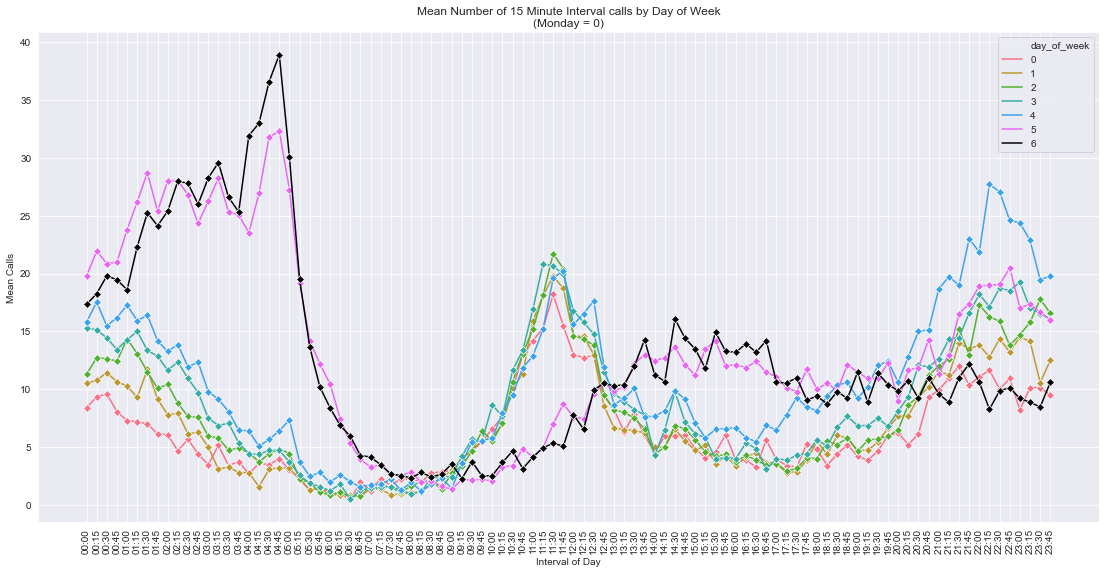

In [286]:
# get in same hue as the hourly plot

fig, ax = plt.subplots()
fig.set_size_inches(19, 9)

 
sns.set_style("darkgrid")
  

#sns.set_palette("husl")
sns.lineplot(x='hhmm', y='count', data=gdow15,   hue='day_of_week', legend='full', marker = 'D',
            palette=["C0", "C1","C2","C3","C4","C5", "k"])
 

plt.xticks(rotation=90)    
plt.title('Mean Number of 15 Minute Interval calls by Day of Week' +  '\n' +  '(Monday = 0)')
plt.xlabel('Interval of Day')
plt.ylabel('Mean Calls')
 


Text(0, 0.5, 'Mean Calls')

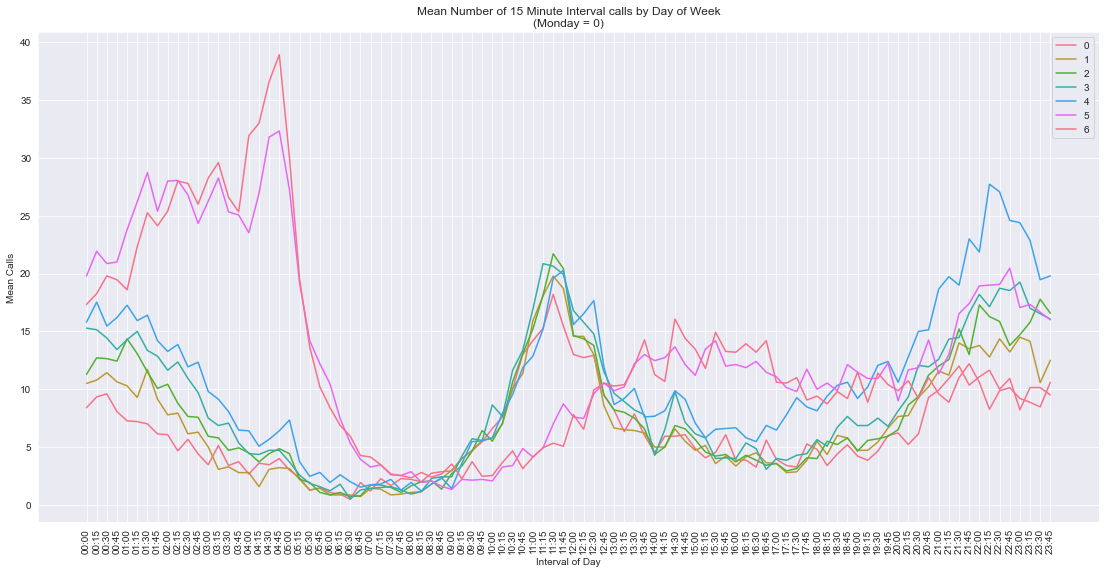

In [284]:
# Plot  number of calls per interval by day of week (dow)

# --> see how number of calls per interval changes by dow

groups = gdow15.groupby('day_of_week')

fig, ax = plt.subplots()
fig.set_size_inches(19, 9)
for label, group in groups:
#    print(label, group)
    ax.plot(group['hhmm'], group['count'],  label=label)
plt.legend()
#xtitle = 'Mean Number of Hourly calls by Day of Week' +  ''\n' +  'Monday = 0'


plt.xticks(rotation=90)    
plt.title('Mean Number of 15 Minute Interval calls by Day of Week' +  '\n' +  '(Monday = 0)')
plt.xlabel('Interval of Day')
plt.ylabel('Mean Calls')
 
 


 

In [258]:
gdow15

,hhmm,minutes_of_day,day_of_week,count
0,00:00,0,0,8.400000
1,00:00,0,1,10.500000
2,00:00,0,2,11.285714
3,00:00,0,3,15.285714
4,00:00,0,4,15.800000
...,...,...,...,...
667,23:45,1425,2,16.571429
668,23:45,1425,3,16.066667
669,23:45,1425,4,19.800000
670,23:45,1425,5,16.000000


In [ ]:
sns.scatterplot(x=’tip’, y=’total_bill’, data=tips_data, marker=’D’, hue=’time’)

sns.scatterplot(x=’tip’, y=’total_bill’, data=tips_data, marker=’D’, hue=’time’)

Results: weekdays and weekend days have different patterns. Within the two categories, the patterns are similar.

The largest number of calls are on weekends after midnight.

Weekday calls peak around 10 and 11 in the morning.

Weekend days have a slight peak around 3:00 in the afternoon.
 
 
 

# work -- categorical variable plot

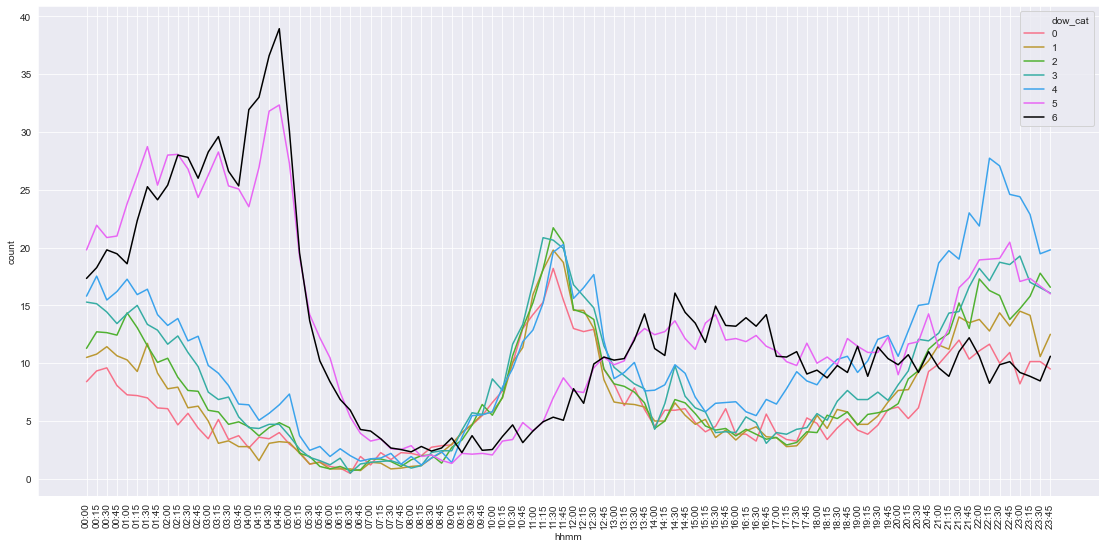

In [278]:
# get in same hue as the hourly plot

fig, ax = plt.subplots()
fig.set_size_inches(19, 9)

 
sns.set_style("darkgrid")

plt.xticks(rotation=90)
#sns.set_palette("husl")
myplot = sns.lineplot(x='hhmm', y='count', data=gdow15,   hue='dow_cat', legend='full',  
             palette=["C0", "C1","C2","C3","C4","C5", "k"])
 
#myplot.set_xticklabels(myplot.get_xticklabels(), rotation=90)



 

In [262]:
gdow15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 4 columns):
hhmm              672 non-null object
minutes_of_day    672 non-null int64
day_of_week       672 non-null int64
count             672 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 21.1+ KB


In [264]:
gdow15['dow_cat'] = gdow15.day_of_week.astype('category')

In [265]:
gdow15.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 5 columns):
hhmm              672 non-null object
minutes_of_day    672 non-null int64
day_of_week       672 non-null int64
count             672 non-null float64
dow_cat           672 non-null category
dtypes: category(1), float64(1), int64(2), object(1)
memory usage: 22.1+ KB
